# Logistic Regression Grid Search

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils, plot_help


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, \
                            roc_curve, roc_auc_score, precision_recall_curve

from joblib import dump, load

%matplotlib inline

In [2]:
#change read limit to -1 to load entire dataframe
df_bus = utils.chunk_loader('data/cleaned/business_merge_feats.csv', read_limit=-1)

df_num = utils.make_num_df(df_bus)

df_num.head()

,review_count,stars,road_type,GoodForKids,RestaurantsReservations,Caters,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,...,Health,Hair,cool_change,funny_change,stars_change,useful,avg_month_checkin,span_checkin,median_income,is_open
0,5,3.0,1.0,0,0,0,0,0,0,0,...,0,0,0.000000,0.00000,0.000000,0.000000,1.777778,5323,3.5,0
1,128,2.5,8.0,1,1,1,1,1,2,0,...,0,0,-0.042484,-0.04902,-0.075163,-0.156863,36.083333,15143,3.0,1
2,170,4.0,6.0,1,1,0,1,1,2,0,...,0,0,-0.110000,-0.19000,0.055000,-0.215000,57.083333,58518,3.5,1
3,3,5.0,1.0,0,0,0,0,0,0,0,...,0,0,0.000000,0.00000,0.000000,-0.500000,1.222222,8464,3.5,1
4,3,2.5,6.0,0,0,0,0,0,2,0,...,0,0,0.000000,0.00000,0.000000,0.000000,1.000000,2971,3.0,1


In [3]:
df_num.shape

(161160, 102)

In [4]:
X_train, X_test, y_train, y_test = utils.train_test_scale (df_num, 
                                                           'is_open', 
                                                           random_state=None)

## Logistic Regression Params Obtained from GridSearch

In [5]:
best_params = {'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

print(best_params)

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


## Undersampling

In [6]:
#apply undersampling
X_under, y_under = utils.undersample(X_train, y_train)

#check mean dist
y_under.mean()

0.5

In [7]:
#instantiate logistic regression
lr_under = LogisticRegression(C=100, 
                              class_weight='balanced', 
                              penalty='l1', 
                              solver='liblinear', 
                              max_iter=400, 
                              n_jobs=-1)

#fit to training data
lr_under.fit(X_under, y_under)

/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=400, multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.36      0.63      0.46      6072
           1       0.90      0.74      0.81     26160

    accuracy                           0.72     32232
   macro avg       0.63      0.68      0.63     32232
weighted avg       0.79      0.72      0.74     32232

----------
Normalized confusion matrix


/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


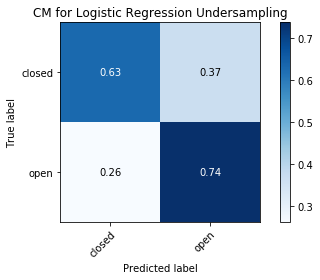

----------


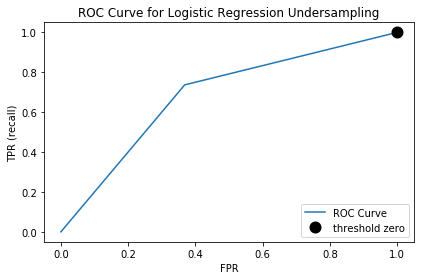

Area Under Curve = 0.6844
----------


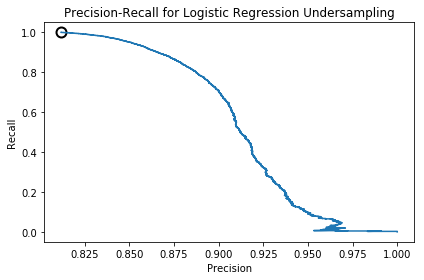

In [8]:
#make pred with undersampling
y_pred_under = lr_under.predict(X_test)

print(classification_report(y_test, y_pred_under))
print(10*'-')
plot_help.plot_confusion_matrix(y_test, y_pred_under, ['closed', 'open'], normalize=True,
                                title='Logistic Regression Undersampling')
print(10*'-')
plot_help.plot_roc_curve(y_test, y_pred_under, 'Logistic Regression Undersampling')
print(10*'-')
plot_help.plot_prc_curve(y_test, lr_under.predict_proba(X_test)[:, 1], 'Logistic Regression Undersampling')

## Oversample

In [9]:
#apply undersampling
X_over, y_over = utils.oversample(X_train, y_train)

#check mean 
y_over.mean()

0.44714800950378614

In [10]:
#instantiate logistic regression
lr_over = LogisticRegression(C=100, 
                              class_weight='balanced', 
                              penalty='l1', 
                              solver='liblinear', 
                              max_iter=400,
                              n_jobs=-1)

#fit to training data
lr_over.fit(X_over, y_over)

/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=400, multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.36      0.63      0.46      6072
           1       0.90      0.74      0.81     26160

    accuracy                           0.72     32232
   macro avg       0.63      0.68      0.63     32232
weighted avg       0.79      0.72      0.74     32232

----------
Normalized confusion matrix


/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


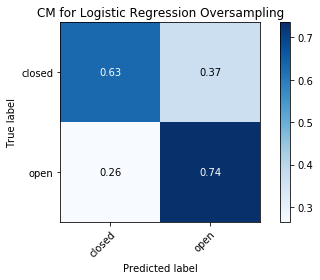

----------


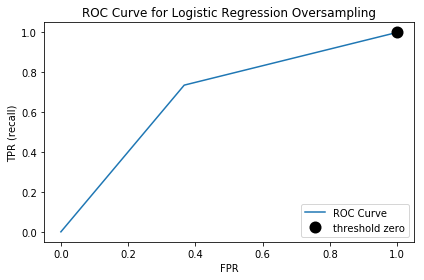

Area Under Curve = 0.6844
----------


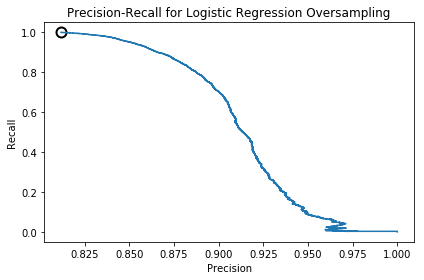

In [11]:
#make pred with oversampling
y_pred_over = lr_over.predict(X_test)

print(classification_report(y_test, y_pred_over))
print(10*'-')
plot_help.plot_confusion_matrix(y_test, y_pred_over, ['closed', 'open'], normalize=True,
                                title='Logistic Regression Oversampling')
print(10*'-')
plot_help.plot_roc_curve(y_test, y_pred_over, 'Logistic Regression Oversampling')
print(10*'-')
plot_help.plot_prc_curve(y_test, lr_over.predict_proba(X_test)[:, 1], 'Logistic Regression Oversampling')